In [1]:
# importing prerequisite libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
fuel_econ = pd.read_csv('./fuel-econ.csv')
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


## Adapted Bar Charts
<p style='font-size:16px'>Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.<br><hr>
For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's `barplot` function:

<i>Converting Univariate Bar chart to Bivariate Bar:</i>
* Here on the second chart the vertical line on top of Bar represent the uncertainity of a value.
* On y-axis this is the mean of values on x-axis
***

<img src='https://i.postimg.cc/nzKryv3k/Screenshot-5.png' width=640 height=340>

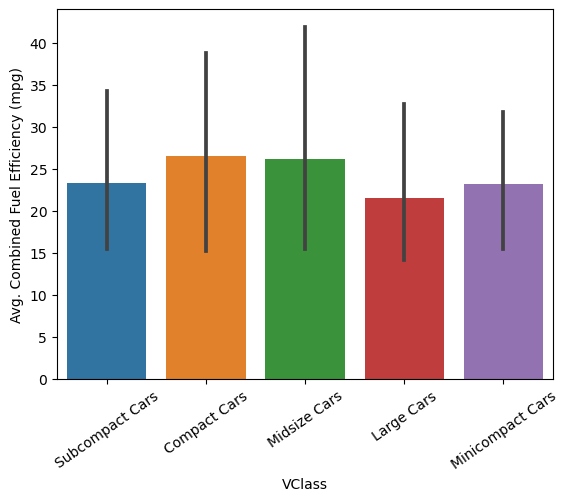

In [3]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ,x='VClass',y='comb',errorbar='pi');

# Try these additional arguments
# sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
# sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd',errwidth=8,errcolor='red')



plt.xticks(rotation=35);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');


The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.
### Alternative to barplot() ==> pointplot()
As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

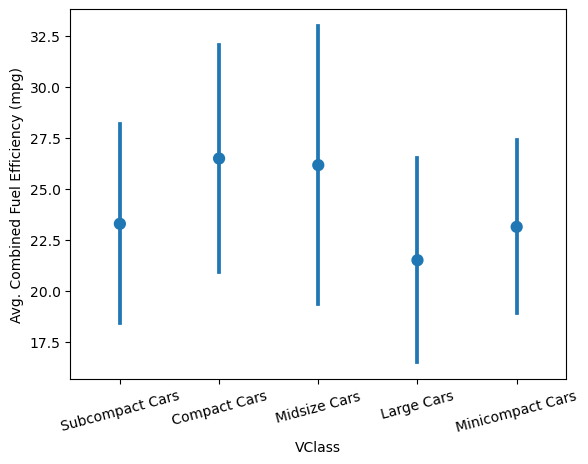

In [4]:
# linestyles parameter removes the regression line from plots
sb.pointplot(data=fuel_econ,x='VClass',y='comb',linestyles='',errorbar='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

<h3 class='alert alert-success';>Example 3. Bringing a few charts together</h3>


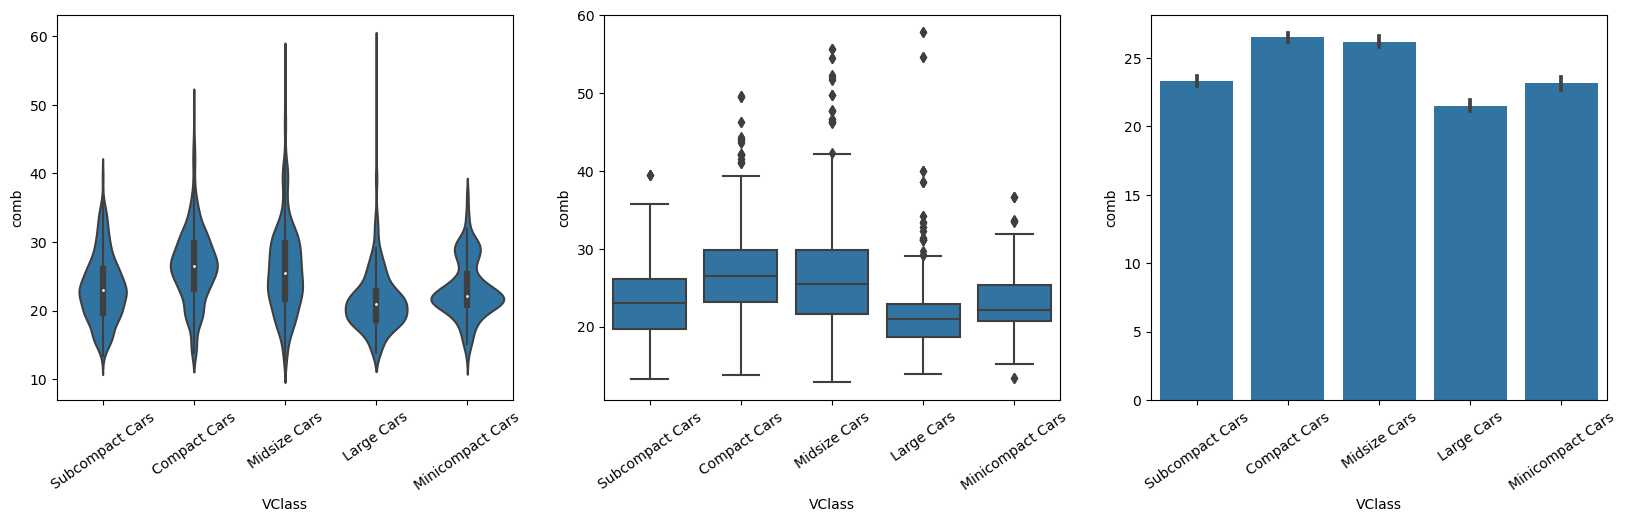

In [5]:
plt.figure(figsize=(20,5));

base_color = sb.color_palette()[0]

plt.subplot(1,3,1);
sb.violinplot(data=fuel_econ,x='VClass',y='comb',color=base_color);
plt.xticks(rotation=35);

plt.subplot(1,3,2);
sb.boxplot(data=fuel_econ,x='VClass',y='comb',color=base_color);
plt.xticks(rotation=35);

plt.subplot(1,3,3);
sb.barplot(data=fuel_econ,x='VClass',y='comb',color=base_color);
plt.xticks(rotation=35);

> ### Do you know? 🎆
    Matplotlib's hist() function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.

### Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's errorbar() function, performing some processing on the data in order to get it into its necessary form.

> It's also known as TimeSeries plot

<img src='https://i.postimg.cc/pLCNpvCR/Screenshot-7.png' width=540 height=200>

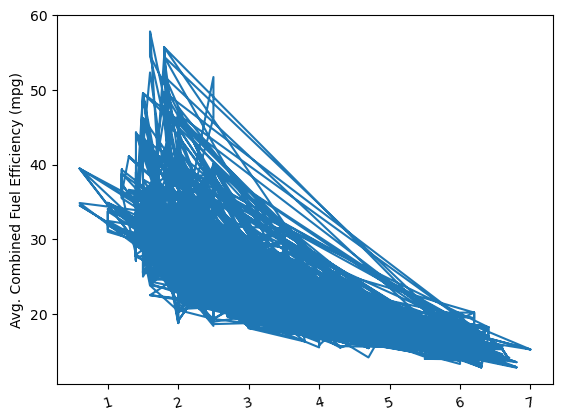

In [6]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [7]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
print(bin_edges)
bin_centers = bin_edges[:-1] + 0.1
print(bin_centers)

[0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.
 4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7. ]
[0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1
 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9]


In [8]:
fuel_econ[['displ']].head(3)

,displ
0,3.8
1,2.0
2,3.6


In [9]:
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

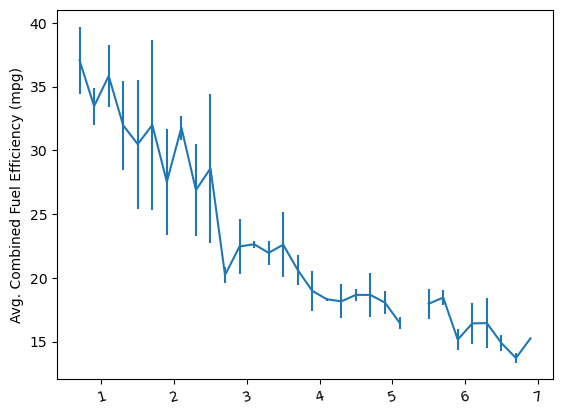

In [10]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# print(comb_mean)
# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Additional_Plot_Practice

In [11]:
from solutions_bivariate import additionalplot_solution_1, additionalplot_solution_2

In [15]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

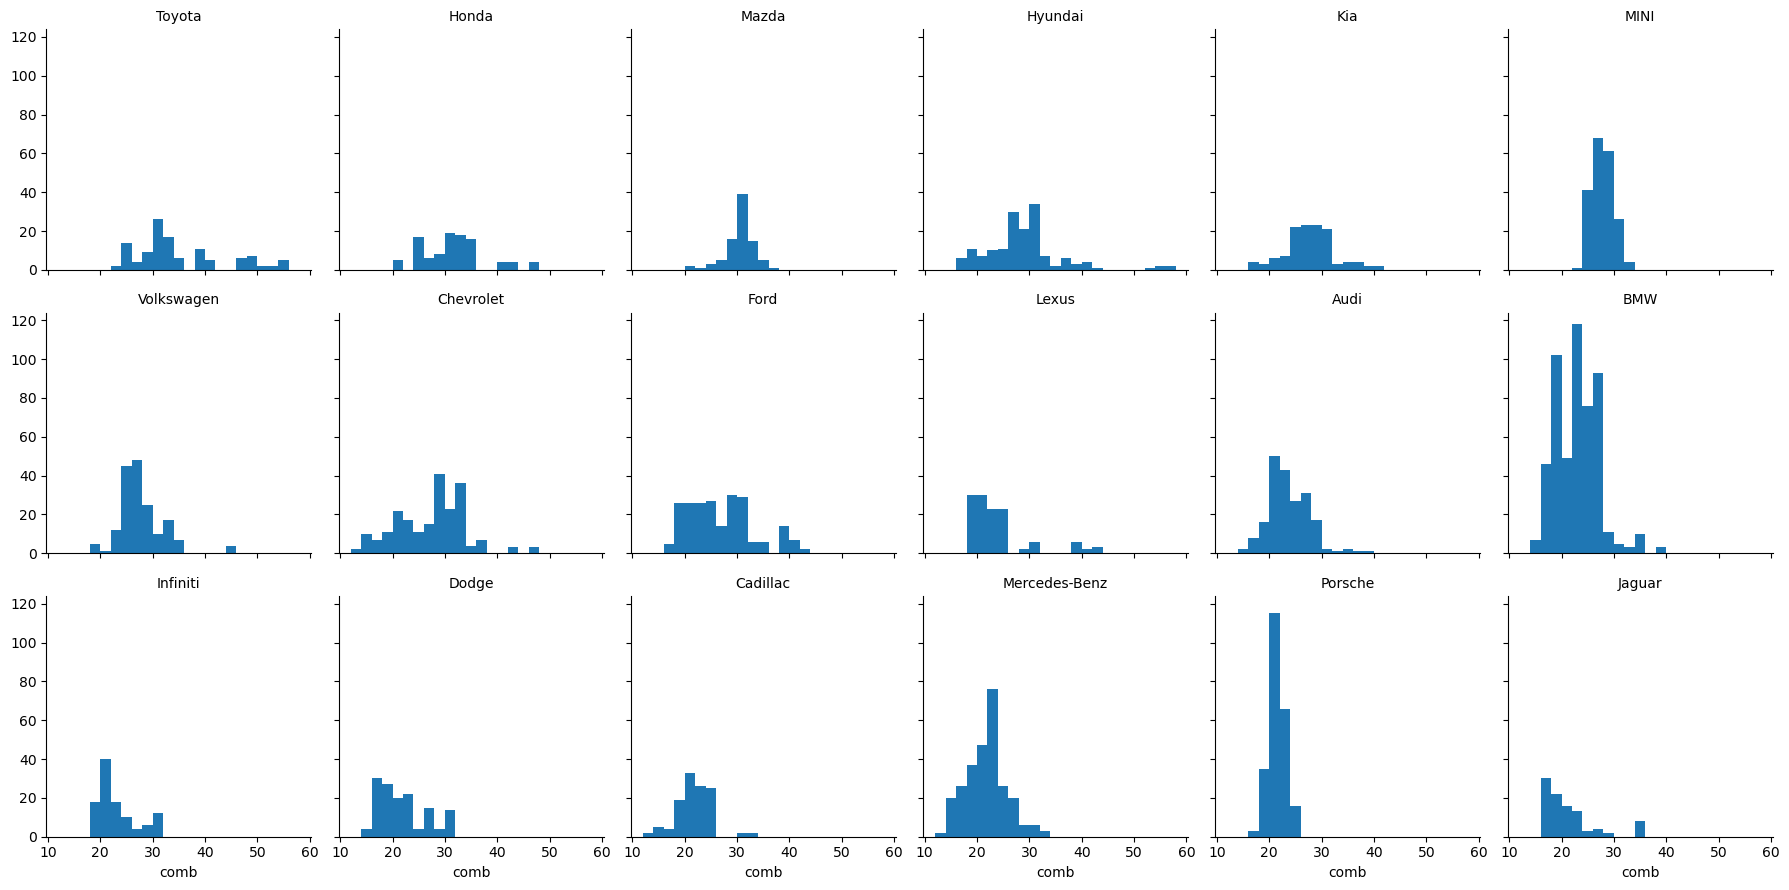

In [30]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean(numeric_only=True)
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6,col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}');


Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


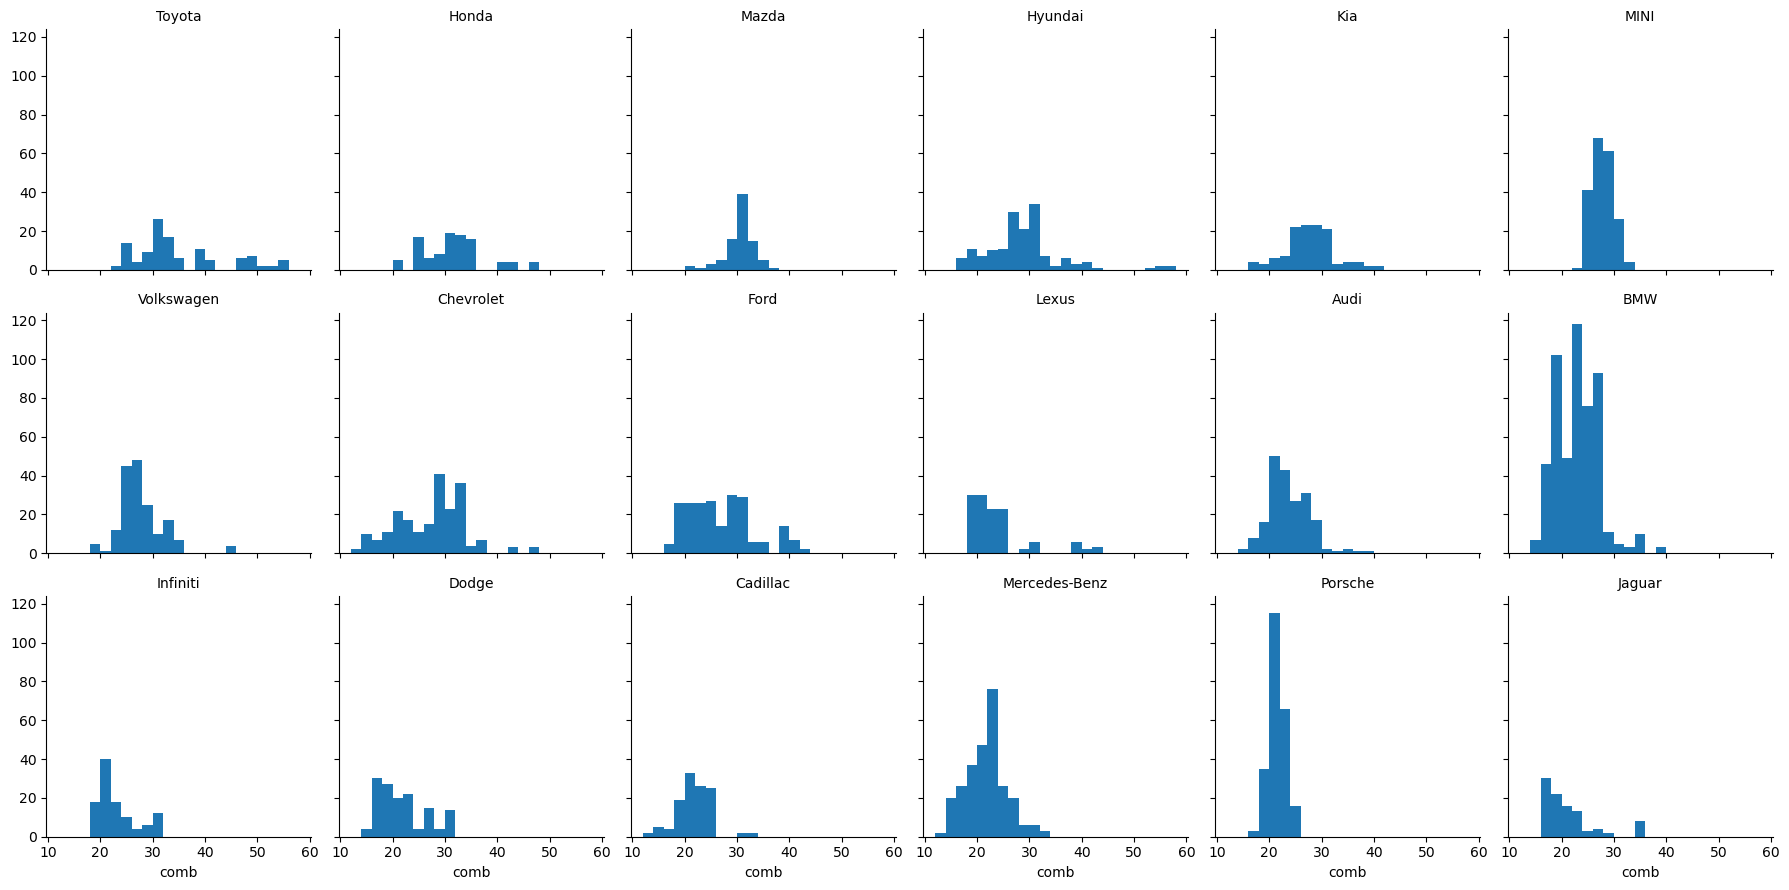

In [16]:
# run this cell to check your work against ours
additionalplot_solution_1()

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

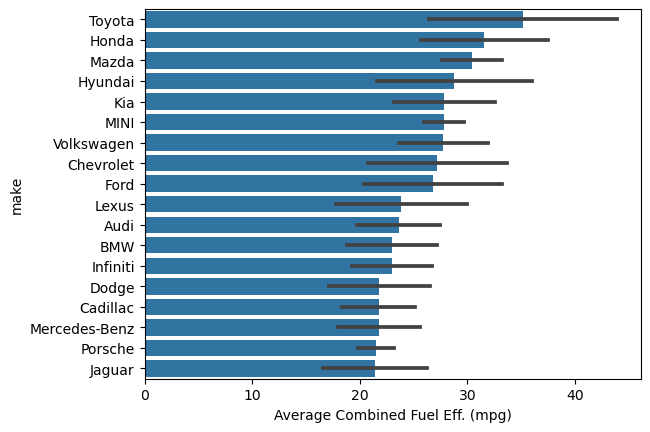

In [33]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make',).mean(numeric_only=True)
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
           color = base_color, order = comb_order, errorbar = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

## Different types of Plots
![Types of plots](https://www.programsbuzz.com/sites/default/files/inline-images/rsz_screenshot_2022-01-24_at_91801_pm.jpg)

## Summary of the functions in Matplotlib & Seaborn


![Matplotlib-and-Seaborn-Functions-Summary-1.jpg](./Matplotlib_and_Seaborn_Functions_Summary.svg "Functions summary")




## Types of Color Palettes

There are three main palette types to consider: qualitative, sequential, and diverging.
### Qualitative palette
![qualitative palette](https://i.postimg.cc/htbj1qnj/qualitative.png)

### Sequential palette
![sequential palette](https://i.postimg.cc/FzyRCtSD/sequential.png)

### Diverging palette
![Diverging palette](https://i.postimg.cc/prHVF0S8/diverging.png)


* Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
* Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
* Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

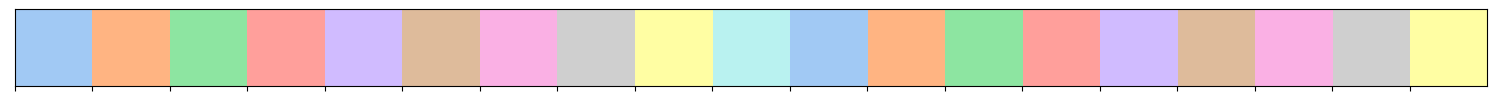

In [164]:
# Example of qualititive palette
# 'sb.palplot' is used to create a grid for displaying color palette and other graphics.
sb.palplot(sb.color_palette('pastel',n_colors=19,))

In [157]:
# Example of sequential palette
# viridis is latin word for 'green' because most of the colors in this palette is made up of green color.
sb.color_palette('viridis',19)

[(0.280267, 0.073417, 0.397163),
 (0.282623, 0.140926, 0.457517),
 (0.273006, 0.20452, 0.501721),
 (0.253935, 0.265254, 0.529983),
 (0.229739, 0.322361, 0.545706),
 (0.206756, 0.371758, 0.553117),
 (0.183898, 0.422383, 0.556944),
 (0.163625, 0.471133, 0.558148),
 (0.144759, 0.519093, 0.556572),
 (0.127568, 0.566949, 0.550556),
 (0.119423, 0.611141, 0.538982),
 (0.134692, 0.658636, 0.517649),
 (0.185783, 0.704891, 0.485273),
 (0.266941, 0.748751, 0.440573),
 (0.369214, 0.788888, 0.382914),
 (0.477504, 0.821444, 0.318195),
 (0.606045, 0.850733, 0.236712),
 (0.741388, 0.873449, 0.149561),
 (0.876168, 0.891125, 0.09525)]

In [155]:
# Example of diverging palette
sb.color_palette('vlag',19)

[(0.25691416, 0.4639437, 0.73566943),
 (0.35551826, 0.51744353, 0.73994642),
 (0.4437909, 0.57106468, 0.75183427),
 (0.52753571, 0.62574126, 0.77013939),
 (0.60934065, 0.68212194, 0.79422987),
 (0.68441395, 0.73612771, 0.82136094),
 (0.76621987, 0.79719185, 0.85598668),
 (0.84921192, 0.86135782, 0.89626076),
 (0.93231683, 0.9275351, 0.94109192),
 (0.9805997, 0.96155216, 0.95813083),
 (0.96507281, 0.91018664, 0.90514124),
 (0.92704736, 0.82865028, 0.82181656),
 (0.89183355, 0.74809474, 0.73962689),
 (0.85899928, 0.66937226, 0.6596292),
 (0.82740268, 0.59209095, 0.58167944),
 (0.79842217, 0.5216578, 0.51146173),
 (0.76638802, 0.44577901, 0.43718292),
 (0.73278943, 0.36956954, 0.36476549),
 (0.6967754, 0.29162126, 0.29422741)]

([], [])

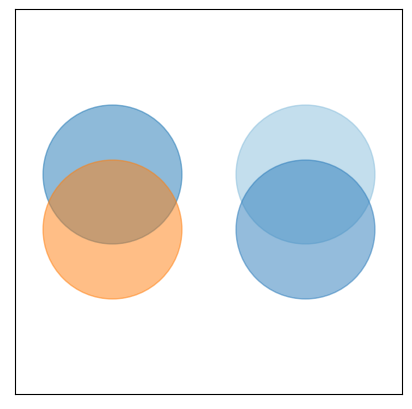

In [192]:
plt.figure(figsize = [5,5])

# left: qualitative points
# here alpha represent intensity of color while s=1e4 represent size of the marker which is 1e4 => 10000 or 1e3 => 1000
plt.scatter(x= 0,y = 0.5, s=1e4 ,color=sb.color_palette()[0],alpha=0.5);
plt.scatter(x= 0,y = -0.5, s=1e4, color = sb.color_palette()[1],alpha=0.5)

# # right: quantitative points
plt.scatter(x=1, y=0.5, s = 1e4, color = sb.color_palette('Blues')[2],alpha=0.5)
plt.scatter(x=1, y=-0.5, s = 1e4, color = sb.color_palette('Blues')[4],alpha=0.5);

# seting x and y limits to overlap both the point
plt.xlim(-0.5,1.5);
plt.ylim(-3.5,3.5);

# removing indication numbers from the x-axis and y-axis
plt.xticks([])
plt.yticks([])